## Required Imports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

## Reading Data

In [10]:
df = pd.read_csv("FuelConsumptionCo2.csv") # Data Frame
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Selecting Some Features

In [12]:
cdf  = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Plots

### Histogram

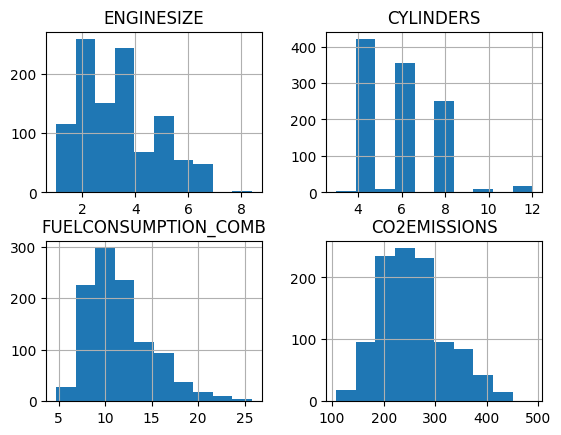

In [13]:
visualizedData = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
visualizedData.hist()
plt.show()

### Scatter

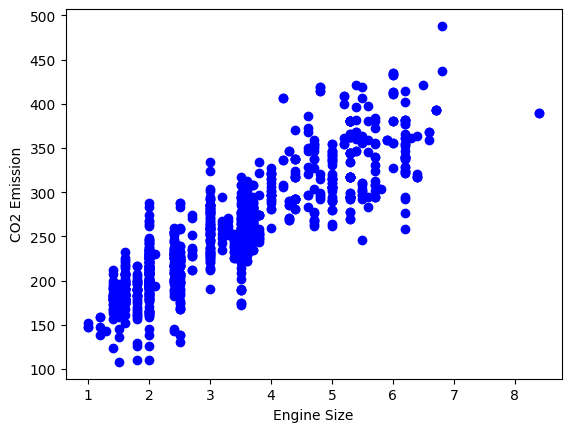

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

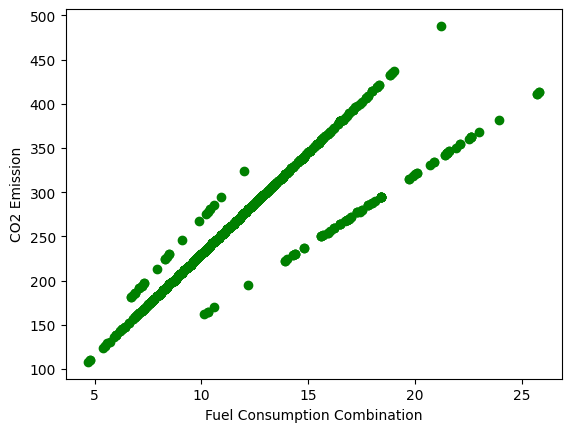

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="green")
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

## Mask

In [16]:
mask = np.random.rand(len(df)) < 0.8
trainData = cdf[mask]  # select 80% of all records randomly
testData = cdf[~mask]  # remained 20%


### Plots

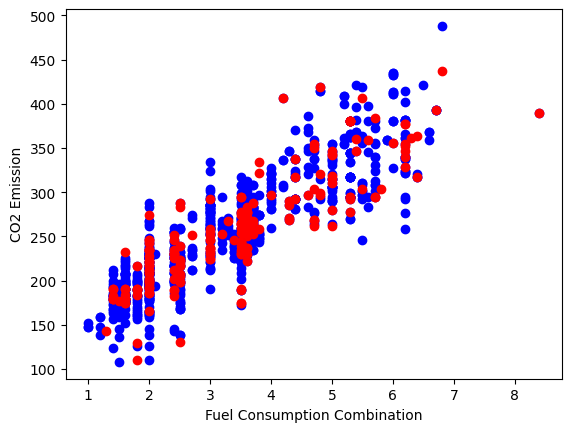

In [21]:
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)

axes.scatter(trainData.ENGINESIZE, trainData.CO2EMISSIONS, color="blue")
axes.scatter(testData.ENGINESIZE, testData.CO2EMISSIONS, color="red")
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

## Modeling

In [18]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

train_x = np.asanyarray(trainData[["ENGINESIZE"]])
train_y = np.asanyarray(trainData[["CO2EMISSIONS"]])

reg.fit(train_x, train_y)

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)
print(f"y = {reg.intercept_[0]} + {reg.coef_[0][0]}*x")

Coefficients:  [[39.57962646]]
Intercept:  [124.35722246]
y = 124.35722245984289 + 39.579626461362786*x


## Plot The Output

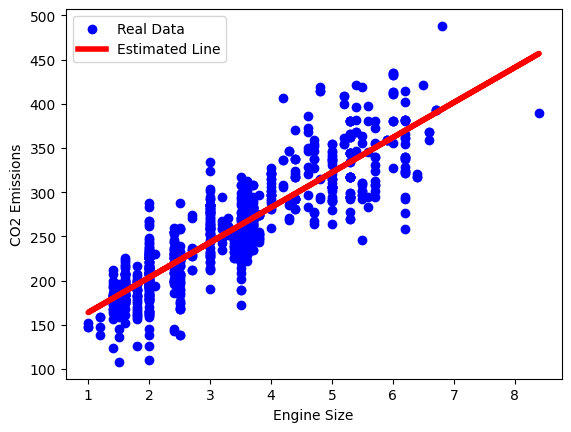

In [19]:
plt.scatter(trainData.ENGINESIZE, trainData.CO2EMISSIONS, label="Real Data", color="blue")
plt.plot(train_x, reg.intercept_[0] + reg.coef_[0][0] * train_x, "r", linewidth=4, label="Estimated Line")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()

## Error

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(testData[["ENGINESIZE"]])
test_y = np.asanyarray(testData[["CO2EMISSIONS"]])
predicted_y = reg.predict(test_x)

print(f"Mean Absolute Error: {np.mean(np.absolute(test_y - predicted_y))}")
print(f"Residual Sum of Squares Error (MSE): {np.mean((test_y - predicted_y) ** 2)}")
print(f"R2-Score (between 0 and 1, 1 is ideal): {r2_score(test_y, predicted_y)}")


Mean Absolute Error: 23.435486340244662
Residual Sum of Squares Error (MSE): 1013.9507223429827
R2-Score (between 0 and 1, 1 is ideal): 0.739413901348806
